<a href="https://colab.research.google.com/github/pritam-dante/machineLearning/blob/main/Projects/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#check for missing value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data --> Model find it hard to read from word instead of number

In [8]:
# encoding "fuel_type" column
car_dataset.replace({'Fuel_Type' :{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "seller_type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [30]:
car_dataset.shape

(301, 9)

Splitting the Data and Target

In [10]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

Splitting the training and test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

Model Training


        1.Linear Regression

In [12]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [13]:
# fitting the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [14]:
# predicting on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [15]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8780935044851448


Visualize the actual and predicted price

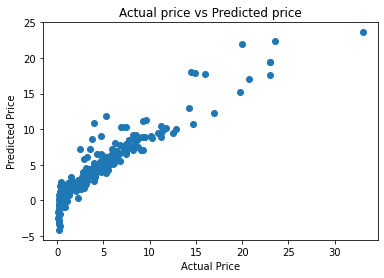

In [17]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted price')
plt.show()

In [18]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error  : ",error_score)

R squared error  :  0.7807728257014409


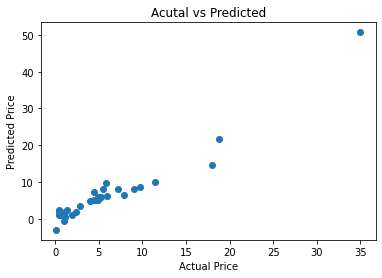

In [21]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Acutal vs Predicted")
plt.show()

      2. Lasso Regression

In [22]:
# loading the Lasso regression
lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [24]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8584293897581423


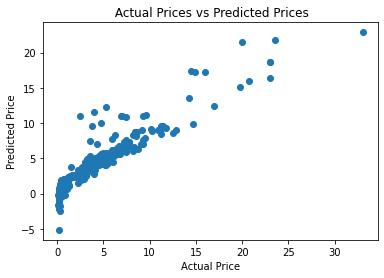

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7169975138500202


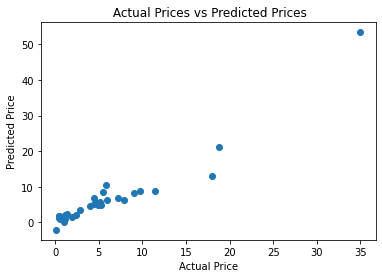

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()